# 基于信息增益率的方法：

In [1]:
from sklearn.feature_extraction import DictVectorizer
from sklearn import tree
from sklearn import preprocessing
import csv

读入数据

In [2]:
data = open(r'./AllElectronics.csv', 'r')
reader = csv.reader(data)

获取第一行数据，表头

In [3]:
# 获取第一行数据
headers = reader.__next__()
print(headers)

['RID', 'age', 'income', 'student', 'credit', 'buy_computer']


定义两个列表

In [4]:
featureList = []  # 存入每个人的信息
labelList = []    # 存入标签

录入数据

In [5]:
for row in reader:
    # 把 label 存入 list
    labelList.append(row[-1])
    rowDict = {}
    for i in range(1, len(row)-1): # 第 0 行是表头，所以跳过
        # 建立一个数据字典
        rowDict[headers[i]] = row[i]
    featureList.append(rowDict)

print(featureList)

[{'age': 'youth', 'income': 'high', 'student': 'no', 'credit': 'fair'}, {'age': 'youth', 'income': 'high', 'student': 'no', 'credit': 'excellent'}, {'age': 'middle_aged', 'income': 'high', 'student': 'no', 'credit': 'fair'}, {'age': 'senior', 'income': 'medium', 'student': 'no', 'credit': 'fair'}, {'age': 'senior', 'income': 'low', 'student': 'yes', 'credit': 'fair'}, {'age': 'senior', 'income': 'low', 'student': 'yes', 'credit': 'excellent'}, {'age': 'middle_aged', 'income': 'low', 'student': 'yes', 'credit': 'excellent'}, {'age': 'youth', 'income': 'medium', 'student': 'no', 'credit': 'fair'}, {'age': 'youth', 'income': 'low', 'student': 'yes', 'credit': 'fair'}, {'age': 'senior', 'income': 'medium', 'student': 'yes', 'credit': 'fair'}, {'age': 'youth', 'income': 'medium', 'student': 'yes', 'credit': 'excellent'}, {'age': 'middle_aged', 'income': 'medium', 'student': 'no', 'credit': 'excellent'}, {'age': 'middle_aged', 'income': 'high', 'student': 'yes', 'credit': 'fair'}, {'age': 's

利用 DictVectorizer 工具将数据转换为 01 表示

In [6]:
vectool = DictVectorizer()
x_data = vectool.fit_transform(featureList).toarray()
print("x_data: \n" + str(x_data))

x_data: 
[[0. 0. 1. 0. 1. 1. 0. 0. 1. 0.]
 [0. 0. 1. 1. 0. 1. 0. 0. 1. 0.]
 [1. 0. 0. 0. 1. 1. 0. 0. 1. 0.]
 [0. 1. 0. 0. 1. 0. 0. 1. 1. 0.]
 [0. 1. 0. 0. 1. 0. 1. 0. 0. 1.]
 [0. 1. 0. 1. 0. 0. 1. 0. 0. 1.]
 [1. 0. 0. 1. 0. 0. 1. 0. 0. 1.]
 [0. 0. 1. 0. 1. 0. 0. 1. 1. 0.]
 [0. 0. 1. 0. 1. 0. 1. 0. 0. 1.]
 [0. 1. 0. 0. 1. 0. 0. 1. 0. 1.]
 [0. 0. 1. 1. 0. 0. 0. 1. 0. 1.]
 [1. 0. 0. 1. 0. 0. 0. 1. 1. 0.]
 [1. 0. 0. 0. 1. 1. 0. 0. 0. 1.]
 [0. 1. 0. 1. 0. 0. 0. 1. 1. 0.]]


打印属性名称

In [7]:
print(vectool.get_feature_names())

['age=middle_aged', 'age=senior', 'age=youth', 'credit=excellent', 'credit=fair', 'income=high', 'income=low', 'income=medium', 'student=no', 'student=yes']


对照解释 x_data：

可以看到`get_feature_names()` 输出有 $10$ 个特征类，x_data：每个对象也有十列。以 x_data 的第一行为例：

- 001：age = 'youth'
- 10: credit = 'excellent'
- 100: income = 'high'
- 10: student = 'no'

打印并转换标签为 01 表示（借助LabelBinarizer）：

In [8]:
print("LabelList: \n", str(labelList))

lb = preprocessing.LabelBinarizer()
y_data = lb.fit_transform(labelList)
print("y_data: \n", y_data)

LabelList: 
 ['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'no']
y_data: 
 [[0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]]


创建决策树模型：

In [9]:
model = tree.DecisionTreeClassifier(criterion='entropy')
# criterion = 'entropy' 是基于 information gain 算法
# criterion = 'gini' 则是 CART 算法

输入数据建立模型

In [10]:
model.fit(x_data, y_data)

DecisionTreeClassifier(criterion='entropy')

测试

In [11]:
x_test = x_data[0]
print("X_test: ", x_test, ", x_test_label = ", y_data[0])

predict = model.predict(x_test.reshape(1, -1))
print('predict: ', predict)

X_test:  [0. 0. 1. 0. 1. 1. 0. 0. 1. 0.] , x_test_label =  [0]
predict:  [0]


可以看到预测正确了。

接下来导出决策树：

In [12]:
vectool.get_feature_names()

['age=middle_aged',
 'age=senior',
 'age=youth',
 'credit=excellent',
 'credit=fair',
 'income=high',
 'income=low',
 'income=medium',
 'student=no',
 'student=yes']

In [13]:
lb.classes_

array(['no', 'yes'], dtype='<U3')

In [14]:
import graphviz

dot_data = tree.export_graphviz(model,
                               out_file=None,
                               feature_names=vectool.get_feature_names(),  # 特征名字
                               class_names=lb.classes_,         # 标签
                               filled=True,
                               rounded=True,
                               special_characters=True)

graph = graphviz.Source(dot_data)

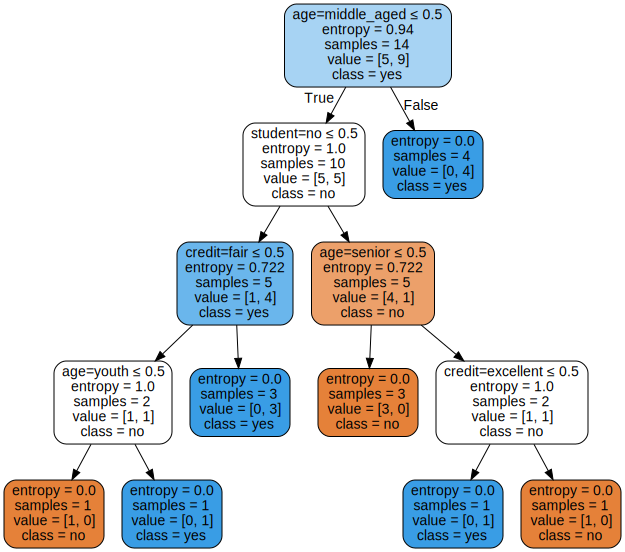

In [15]:
graph

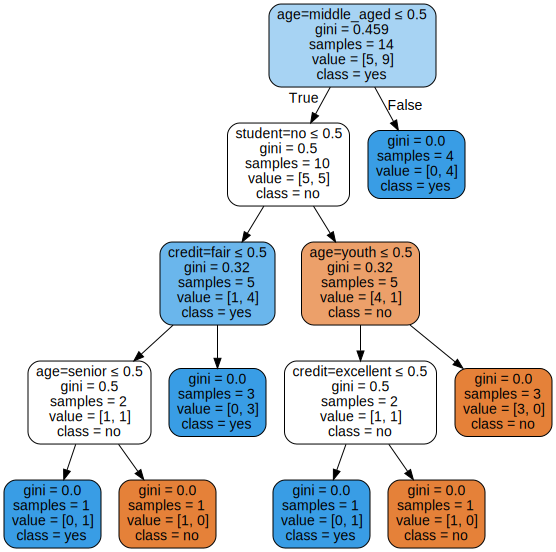

In [17]:
model_g = tree.DecisionTreeClassifier(criterion='gini')
model_g.fit(x_data, y_data)

ddata = tree.export_graphviz(model_g,
                             out_file=None,
                             feature_names=vectool.get_feature_names(),  # 特征名字
                             class_names=lb.classes_,         # 标签
                             filled=True,
                             rounded=True,
                             special_characters=True)

graph = graphviz.Source(ddata)
graph